In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import pickle
%matplotlib inline

In [3]:
X_hr = pd.read_csv('Ghazipur.csv')

In [4]:
print(X_hr)

       State_Name ind_district      X2       Y        X1       X3       X4
0   Uttar Pradesh     ghazipur  134838  298115       NaN  835.689  952.049
1   Uttar Pradesh     ghazipur  134616  265915  298115.0  738.389  835.689
2   Uttar Pradesh     ghazipur  136533  314658  265915.0  717.365  738.389
3   Uttar Pradesh     ghazipur  137877  261830  314658.0  579.414  717.365
4   Uttar Pradesh     ghazipur  156348  343647  261830.0  671.436  579.414
5   Uttar Pradesh     ghazipur  151011  298868  343647.0  764.255  671.436
6   Uttar Pradesh     ghazipur  155599  344404  298868.0      NaN      NaN
7   Uttar Pradesh     ghazipur  151689  157236  344404.0      NaN      NaN
8   Uttar Pradesh     ghazipur  144930  278990  157236.0  666.700  381.800
9   Uttar Pradesh     ghazipur  149754  288576  278990.0  814.200  666.700
10  Uttar Pradesh     ghazipur  149871  324021  288576.0      NaN  814.200
11  Uttar Pradesh     ghazipur  151654  339402  324021.0      NaN      NaN
12  Uttar Pradesh     gha

       State_Name ind_district      X2       Y        X1       X3       X4
1   Uttar Pradesh     ghazipur  134616  265915  298115.0  738.389  835.689
2   Uttar Pradesh     ghazipur  136533  314658  265915.0  717.365  738.389
3   Uttar Pradesh     ghazipur  137877  261830  314658.0  579.414  717.365
4   Uttar Pradesh     ghazipur  156348  343647  261830.0  671.436  579.414
5   Uttar Pradesh     ghazipur  151011  298868  343647.0  764.255  671.436
8   Uttar Pradesh     ghazipur  144930  278990  157236.0  666.700  381.800
9   Uttar Pradesh     ghazipur  149754  288576  278990.0  814.200  666.700
13  Uttar Pradesh     ghazipur  149321  314321  224041.0  754.400  643.600


(array([1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([261830.        , 264557.23333333, 267284.46666667, 270011.7       ,
        272738.93333333, 275466.16666667, 278193.4       , 280920.63333333,
        283647.86666667, 286375.1       , 289102.33333333, 291829.56666667,
        294556.8       , 297284.03333333, 300011.26666667, 302738.5       ,
        305465.73333333, 308192.96666667, 310920.2       , 313647.43333333,
        316374.66666667, 319101.9       , 321829.13333333, 324556.36666667,
        327283.6       , 330010.83333333, 332738.06666667, 335465.3       ,
        338192.53333333, 340919.76666667, 343647.        ]),
 <a list of 30 Patch objects>)

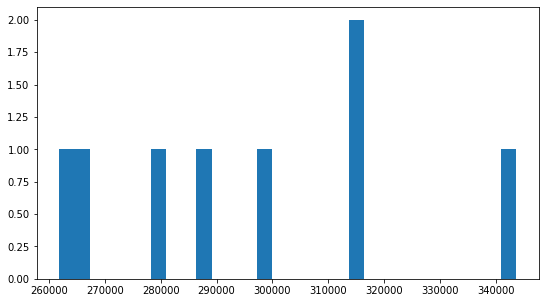

In [16]:
X_finite = X_hr[np.isfinite(X_hr["X1"])]
#print(X_finite)
X_finite = X_finite[np.isfinite(X_finite["X2"])]

X_finite = X_finite[np.isfinite(X_finite["X3"])]
X_finite = X_finite[np.isfinite(X_finite["X4"])]
#print(X_finite)
Xn = X_finite
print(Xn)
y = Xn["Y"]
X = Xn[["X1", "X2", "X3", "X4"]]
plt.figure(figsize=(9, 5))
plt.hist(y, bins=30)

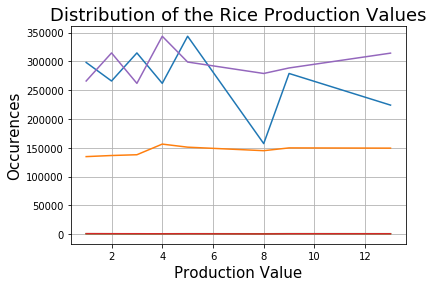

In [18]:
plt.xlabel('Production Value',fontsize=15)
plt.ylabel('Occurences',fontsize=15)
plt.title('Distribution of the Rice Production Values',fontsize=18)
plt.grid(True)
Xplot = Xn[["X1", "X2", "X3", "X4","Y"]]
plt.plot(Xplot)

Text(0.5, 1.0, 'Distribution of y variable with feature X1')

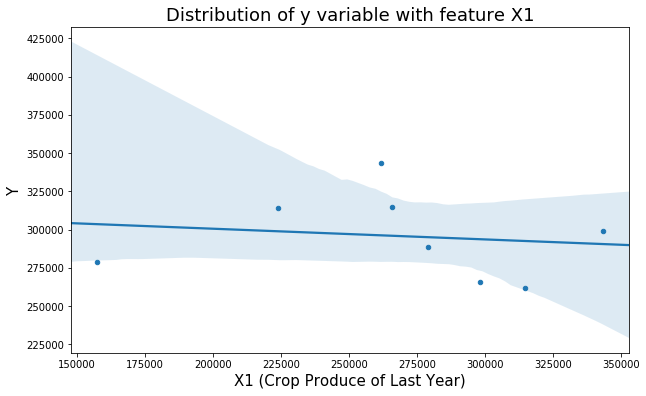

In [39]:
var_name = "X1"
plt.figure(figsize=(10,6))
sns.regplot(x=var_name, y='Y', data=Xplot, scatter_kws={'alpha':1, 's':20})
plt.xlabel(var_name + " (Crop Produce of Last Year)", fontsize=15)
plt.ylabel('Y', fontsize=15)
plt.title("Distribution of y variable with feature "+var_name, fontsize=18)

In [35]:
cols = list(X.columns)


In [41]:
for col in cols:
    col_zscore = col + '_zscore'
    X[col_zscore] = (X[col] - X[col].mean())/X[col].std(ddof=0)
X = X[["X1_zscore", "X2_zscore", "X3_zscore", "X4_zscore"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

c:\users\harsh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [51]:
alg = LinearRegression()
alg.fit(X_train, y_train)
filename = 'ghazipur.pkl'  #name the file 
pickle.dump(alg, open(filename, 'wb'))  # dump into pickle mode
coef = alg.coef_
coef = coef.round(decimals=2)
np.set_printoptions(suppress=True)

In [45]:
print("The coefficients for the linear regression model learnt are\n")
print(coef)
print()

The coefficients for the linear regression model learnt are

[ -9123.32  26407.44 -22382.98  23887.99]



In [46]:
y_predict = alg.predict(X_test)
rmse = sqrt(mean_squared_error(y_predict, y_test))
print(rmse)

45468.272990157195


In [53]:
clf = LinearRegression()
scores = cross_val_score(clf, X, y, cv=5, scoring='neg_mean_squared_error')
for i in range(0,5):
    scores[i] = sqrt(-1*scores[i])
print(scores)
avg_rmse = scores.mean()
print("\n\nAvg RMSE is ",scores.mean())

[51238.75640983 52338.04198834 91902.77927566 25938.71534044
 18102.43864086]


Avg RMSE is  47904.14633102474


In [18]:
print(type(y_test))
print(type(y_predict))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [48]:
yt = y_test.as_matrix()
print(type(yt))

<class 'numpy.ndarray'>


c:\users\harsh\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [49]:
p=pd.DataFrame()
p["y_predicted"] = y_predict
p["y_test"] = yt
p["y_predicted"] = p["y_predicted"].round(decimals=1)

In [21]:
print(p.describe())
print(p)

       y_predicted      y_test
count     2.000000    2.000000
mean    318.250000  288.075500
std      10.960155   37.116742
min     310.500000  261.830000
25%     314.375000  274.952750
50%     318.250000  288.075500
75%     322.125000  301.198250
max     326.000000  314.321000
   y_predicted   y_test
0        310.5  314.321
1        326.0  261.830
